### The following techniques will be used in this notebook- 

1. K means <br>
2. DBSCAN <br>
3. Hierarchical Agglomerative Clustering <br>
4. Principal Component Analysis (PCA)


In [1]:
'''
    ----------------------------------------------------------------------------------------------
    April 2022
    Dr. Maryam Khanahmadi
    Postdoctoral Researcher
    Wallenberg Center for Quantum Technology (WACQT)
    Chalmers University of Technology
    
    m.khanahmadi94@gmail.com
    Data set used: https://www.kaggle.com/datasets/uciml/mushroom-classification
    ----------------------------------------------------------------------------------------------
    
    
    In this notebook we are using Mushroom classification data set where different types of mushrooms
    are classified into two groups- edible or poisonous. 
    The classification is based on numerous features such as- cap shape, cap color, cap surface, bruises, 
    odor etc. 
    
    The data set contains 8124 rows and 23 columns (features).
    
       
    We plan to employ techniques such as K means, DBSCAN, HAC and Random Forests to cluster the data into
    two sets based on whether the mushrooms are edible or poisonous. 
    
    
    So the work plan is as follows- 
    1. Data exploration and data cleaning.
    2. Label encoding for the relevant object data types.
    3. Check skewness of the data set and remove possible outliers.
    4. K means
    5. DBSCAN
    6. Hierarchical Agglomerative Clustering
    7. Random Forests
    
''';

In [2]:
# All the functions will be placed below- 

def _encoding(DS, cols):
    '''
    This function takes the data set and column indexes as input which needs to be label encoded.
    There are two possible options- one hot encoding or label encoding
        
        
    Arguments- 
        DS   :  The data set
        cols :  Index of the columns which needs to be encoded
        
        
    Returns-
        df   : Encoded data set 
    '''

    num_of_cols = len(cols)
    le = LabelEncoder()
    for i in range(num_of_cols):
        DS.iloc[:,cols[i]] = le.fit_transform(DS.iloc[:,cols[i]])
    return DS



def _kmeans(df, y_col, num, col_name='Kmeans'):
    '''
    This function uses Kmeans clustering to cluster the data and return the data frame
    with a new column specified by col_name. If unspecified, the new column is named 
    'Kmeans'.
    
    Arguments-
    df           :     The data frame to be clustered
    y_col        :     Column name of the y_data
    num          :     Number of clusters
    col_name     :     Name of the column in the returned data frame. If unspecified, it will
                       be named 'Kmeans'.
                       
                       
    Returns-
    df_new       :     A new data frame with Kmeans clustering
    inertia      :     Inertia after the fit
  
    '''
    
    df_new = df
    km = KMeans(n_clusters = num)
    km = km.fit(df.drop(y_col, axis = 1))
    df_new[col_name] = km.predict(df.drop(y_col, axis = 1))
    
    return df_new, km.inertia_
    

    
    
def _AggCluster(df, y_col, n_clus, ltype='ward', complete_full_tree = True, col_name='HAC'):
    
    '''
    This function performs Agglomerative Clustering and returns the clustered results
    as a new column in the data frame.
    
    Arguments-
    df                 :        Data frame
    y_col              :        Column name of the Y data
    n_clus             :        Number of cluster 
    ltype              :        Linkage type. If nothing is specified, ward will be used
    complete_full_tree :        Boolean. By default it is set to True
    col_name           :        Name of the column in the returned data frame. If unspecified, it will
                                be named 'HAC'.
                       
                       
    Returns-
    df_new       :     A new data frame with Kmeans clustering    
    
    '''
    
    df_new = df
    ag = AgglomerativeClustering(n_clusters=n_clus, linkage=ltype, compute_full_tree=complete_full_tree)
    ag = ag.fit(df.drop(y_col, axis = 1))
    df_new[col_name] = ag.fit_predict(df.drop(y_col, axis = 1))
    
    return df_new
    

In [3]:
# Import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("mushrooms.csv")
DF = df.copy()
df.head(8)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m


## Data exploration and data cleaning

In [5]:
# Check the data ype and number of NaN entries in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# Check the unique values in each feature columns
all_cols = df.columns
print("Number of unique entries per feature")
print('--'*24)
for i in all_cols:
    print(i, len(df[i].unique()))

Number of unique entries per feature
------------------------------------------------
class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 5
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


In [7]:
'''
Following  data exploration it is evident that there are no NaN values and all the
entries in each column are of data type 'object', which means that there is no 
numeric entry.

In addition, we would like to check if the data set is balanced. The column 'class'
contains information if a mushroom with certain features is edible (e) or poisonous (p).
This can be checked with the 'value_counts()' function. 

Finally, we would like to know that there are no wrong entry in any of the column. 
This can be checked by investigating the number of unique entries in each feature columns.
The number of occurrence for any outlier should be small and in such a case, we can detect 
and remove such entries from the data set.

From the results below, it is clear that there are no outliers in the data set and we can 
proceed with the 

'''

for i in all_cols:
    print(i)
    print('--'*24)
    print(df[i].value_counts())
    print("\n")


class
------------------------------------------------
e    4208
p    3916
Name: class, dtype: int64


cap-shape
------------------------------------------------
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


cap-surface
------------------------------------------------
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


cap-color
------------------------------------------------
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64


bruises
------------------------------------------------
f    4748
t    3376
Name: bruises, dtype: int64


odor
------------------------------------------------
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64


gill-attachment
------------------------------------------------
f    7914
a     210
Name: gill-attachment, dtype: int64


gill-spacing
------

## Feature engineering

In [8]:
'''
As evident from data exploration procedures, the entries in each feature is of data type 
object. For applying any machine learning algorithm, this needs to be converted into numeric
value. This will be done using Label encoder function of sklearn.
'''

cols = np.where(df.dtypes == object)[0]

# We are using the internal function _encoding() which is defined at the start of the notebook
df = _encoding(df, cols)

In [9]:
# The encoding has been done in such a way that in column 'class', 1 represents poisonous and
# 0 represents edible. 
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## K means clustering

In [22]:
df,_ = _kmeans(df, 'class', 2, col_name='Kmeans')

# Show the results in a data frame
df[['class','Kmeans']]\
.groupby(['Kmeans','class']).size()\
.to_frame().rename(columns={0:'number'})

number
Kmeans class        
0      0        4016
       1        2172
1      0         192
       1        1744

## Agglomerative Clustering

In [17]:
# Linkage type : Ward
df = _AggCluster(df, ['class','Kmeans'], 2,  col_name='HAC (ward)')

# Show the results in a data frame
df[['class','HAC (ward)']]\
.groupby(['HAC (ward)','class']).size()\
.to_frame().rename(columns={0:'number'})

number
HAC (ward) class        
0          0        3984
           1        2164
1          0         224
           1        1752

In [19]:
# Linkage type : Single
df = _AggCluster(df, ['class','Kmeans', 'HAC (ward)'], 2, ltype='single', col_name='HAC (single)')

# Show the results in a data frame
df[['class','HAC (single)']]\
.groupby(['HAC (single)','class']).size()\
.to_frame().rename(columns={0:'number'})

number
HAC (single) class        
0            0        4208
             1        3880
1            1          36

In [20]:
# Linkage type : Complete
df = _AggCluster(df, ['class','Kmeans', 'HAC (ward)', 'HAC (single)'], 2, ltype='complete', col_name='HAC (complete)')

# Show the results in a data frame
df[['class','HAC (complete)']]\
.groupby(['HAC (complete)','class']).size()\
.to_frame().rename(columns={0:'number'})

number
HAC (complete) class        
0              0         624
               1        1884
1              0        3584
               1        2032

In [21]:
# Linkage type : Average
df = _AggCluster(df, ['class','Kmeans', 'HAC (ward)', 'HAC (single)', 'HAC (complete)'], 2, ltype='average', col_name='HAC (Average)')

# Show the results in a data frame
df[['class','HAC (Average)']]\
.groupby(['HAC (Average)','class']).size()\
.to_frame().rename(columns={0:'number'})

number
HAC (Average) class        
0             0        4112
              1        3880
1             0          96
              1          36

## DBSCAN

In [62]:
'''
In this section we will check the efficiency of DBSCAN in clustering the mushroom data set.
DBSCAN is particularly difficult since the algorithm itself decides the number of cluster 
based on eps value and minimum samples and it is often tricky to hypertune this parameter.
'''

df.columns
eps_range = np.linspace(5, 7, 50)
for i in range(len(eps_range)):
    db = DBSCAN(eps = eps_range[i], min_samples = 10)
    db = db.fit(df[df.columns[1:23]])
    print("eps value = ", round(eps_range[i],3))
    print("Number of clusters are:", len(np.unique(db.labels_)))
    score = roc_auc_score(df['class'], db.labels_)
    print(pd.DataFrame(db.labels_).value_counts())
    print("\n")

eps value =  5.0
Number of clusters are: 4
0    6168
1    1824
2      96
3      36
dtype: int64


eps value =  5.041
Number of clusters are: 4
0    6168
1    1824
2      96
3      36
dtype: int64


eps value =  5.082
Number of clusters are: 4
0    6168
1    1824
2      96
3      36
dtype: int64


eps value =  5.122
Number of clusters are: 4
0    6168
1    1824
2      96
3      36
dtype: int64


eps value =  5.163
Number of clusters are: 4
0    6168
1    1824
2      96
3      36
dtype: int64


eps value =  5.204
Number of clusters are: 4
0    6168
1    1824
2      96
3      36
dtype: int64


eps value =  5.245
Number of clusters are: 4
0    6168
1    1824
2      96
3      36
dtype: int64


eps value =  5.286
Number of clusters are: 4
0    6168
1    1824
2      96
3      36
dtype: int64


eps value =  5.327
Number of clusters are: 4
0    6168
1    1824
2      96
3      36
dtype: int64


eps value =  5.367
Number of clusters are: 4
0    6168
1    1824
2      96
3      36
dtype: int64


ep

### As seen from above, it has become very difficult to hypertune the parameters:- 'eps' and 'min_samples' and hence we are not able to use DBSCAN efficiently. However, it is also evident from the above analysis that K means clustering and  Agglomerative Clustering has done pretty good job in clustering the data set into two groups.


In the next section, we shall use Principal Component Analysis (PCA) to reduce the dimensionality of the system and use it to cluster the data set.

## Dimension Reduction using Principal Component Analysis

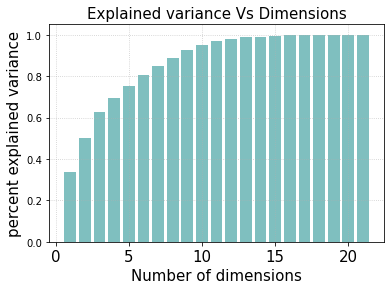

In [16]:
feature_weight_list = []
pca_list = list()
for n in range(1, 22):
    PCAmod = PCA(n_components=n)
    PCAmod.fit(df[df.columns[1:23]])
    
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': df[df.columns[1:23]].columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')


features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))


plt.bar(np.linspace(1,21,21), pca_df['var'], color = 'teal', alpha = 0.5)
plt.xlabel('Number of dimensions', fontsize = 15)
plt.ylabel('percent explained variance', fontsize = 15)
plt.title('Explained variance Vs Dimensions', fontsize = 15)
plt.grid('on',linestyle=':', alpha = 0.7)
plt.tick_params(axis='x', labelsize= 15)


In [129]:
'''
As seen from the bar plot above, using 10 dimensions already explains more than 
90% variance in the data set. The data set in the reduced dimensions can therefore
be used for clustering.
''';

transformed_df = PCAmod.transform(df[df.columns[1:23]])


# Now we can use Kmeans in this dataset using the first 12 columns (which explains more than 95% of the variance)\
transformed_df_12 = pd.DataFrame(transformed_df).iloc[:,:14]
transformed_df_12,_ = _kmeans(transformed_df_12, [], 2, col_name='Kmeans')


# Adding the class column in the data set
transformed_df_12['class'] = df['class']



# Plotting the results
transformed_df_12[['class','Kmeans']]\
.groupby(['Kmeans','class']).size()\
.to_frame().rename(columns={0:'number'})

number
Kmeans class        
0      0        4016
       1        2172
1      0         192
       1        1744

## Visualizing the clusters using the first few Principal Components 

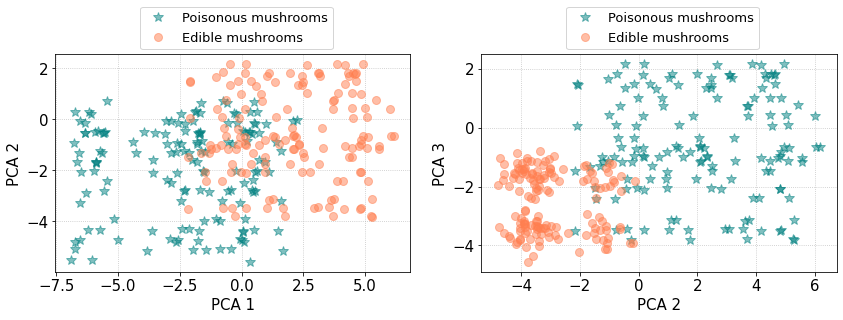

In [222]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))



df['PCA1'] = transformed_df[:,0]
df['PCA2'] = transformed_df[:,1]
X1 = np.array(df[df['class'] ==0].PCA1)
X2 = np.array(df[df['class'] ==0].PCA2)
X3 = np.array(df[df['class'] ==1].PCA1)
X4 = np.array(df[df['class'] ==1].PCA2)
axs[0].plot(X1[1:150], X3[1:150], '*', alpha = 0.5, label = 'Poisonous mushrooms', markersize = 10, color = 'teal')
axs[0].plot(X2[1:150], X4[1:150], 'o', alpha = 0.5, label = 'Edible mushrooms', markersize = 8, color = 'coral')
axs[0].set_xlabel('PCA 1', fontsize = 15)
axs[0].set_ylabel('PCA 2', fontsize = 15)
axs[0].grid('on',linestyle=':', alpha = 0.8)
axs[0].tick_params(axis='y', labelsize=15)
axs[0].tick_params(axis='x', labelsize=15)
axs[0].legend(fontsize = 13,  bbox_to_anchor=(0.4, 0.75, 0.4, 0.5));






df['PCA1'] = transformed_df[:,1]
df['PCA2'] = transformed_df[:,2]
X1 = np.array(df[df['class'] ==0].PCA1)
X2 = np.array(df[df['class'] ==0].PCA2)
X3 = np.array(df[df['class'] ==1].PCA1)
X4 = np.array(df[df['class'] ==1].PCA2)
axs[1].plot(X1[1:150], X3[1:150], '*', alpha = 0.5, label = 'Poisonous mushrooms', markersize = 10, color = 'teal')
axs[1].plot(X2[1:150], X4[1:150], 'o', alpha = 0.5, label = 'Edible mushrooms', markersize = 8, color = 'coral')
axs[1].set_xlabel('PCA 2', fontsize = 15)
axs[1].set_ylabel('PCA 3', fontsize = 15)
axs[1].grid('on',linestyle=':', alpha = 0.8)
axs[1].tick_params(axis='y', labelsize=15)
axs[1].tick_params(axis='x', labelsize=15)
axs[1].legend(fontsize = 13,  bbox_to_anchor=(0.4, 0.75, 0.4, 0.5));

## Conclusions and Summary 

In this notebook we have used unsupervised machine learning algorithms to cluster a data set. <br>
As seen from the results above, Kmeans and HAC seemed to perform the best. <br>
It was found to be difficult to tune the hyperparameters for DBSCAN which made it perform poorly. <br>

Next we used Principal Component Analysis (PCA) to reduce the dimensions of the data set and as can be seen from 
the above figures that the clustering can be observed using the first 3 PCA components.